In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from selenium import webdriver
from bs4 import BeautifulSoup

import time

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
driver = webdriver.Chrome()

In [3]:
data = {}

for i in range(1,8):
    x= f"https://www.amazon.in/s?k=cat+food&page={i}"
    driver.get(x)
    time.sleep(5)
    data[i] = driver.page_source
    print(i)

1
2
3
4
5
6
7


In [4]:
data.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7])

In [5]:
def is_number(x):
    num = True
    for i in x:
        if i not in '1234567890.':
            num = False
    return num


def any_num(x):
    num = False
    
    for i in x:
        if is_number(i) == True:
            num = True
            
    if num == True:
        return True
    else:
        return False
    

def is_kg(x):
    
    if is_number(x) == True and len(x) <=4:
        
        return True

    elif is_number(x) == True and '.' in x:
        return True
    
    
    else:
        return False
        
        



def num_only(x):
    

    
    num = '1234567890'
    
    list_x = []
    temp = ''
    complete = False
    digit_pos = False
    n=0
    ii=x[0]
    
    
    for i,n in zip(x,range(len(x))):
        
        gram_FP = False
        
        if i in num:
            temp = temp+i
            complete = True
            if n == len(x)-1:
                list_x.append(temp)
            
        if i == '.' and complete == True:
            temp = temp + i
            
        if i not in num+'.' and complete == True:
            complete = False
            list_x.append(temp)
            temp = ''
            
            
        if (ii == 'k' and i == 'g') or (ii == 'K' and i == 'g') or (ii == 'K' and i == 'G'):
#             if 'kg' not in list_x:
                list_x.append('kg')
    
            
        elif (i == 'g' or i == 'G'):
            if n == len(x)-1:
                list_x.append('g')
                
            else:
                if 'kg' not in list_x and (x[n:n+4] in 'gram GRAM Gram'.split() or x[n:n+3] in 'Gms' or x[n+1] in ' )'):
#             if 'g' not in list_x:
                    list_x.append('g')
        
#         next_2 = x.index(i,n)
        num_string = ' 1 2 3 4 5 6 7 8 9 0'
    
        if (x[n+1:n+3] in num_string and x[n+1:n+3] not in  [' '+i for i in 'qwertyuioplkjhgfdsazxcvbnm']
           ) or (x[n-2:n] in num_string and x[n-2:n] not in  [i+' ' for i in 'qwertyuioplkjhgfdsazxcvbnm']):
            digit_pos = True
        
        if i == 'x' and digit_pos == True:
            list_x.append('x')
            digit_pos = False
            
        elif i == '+' and digit_pos == True:
            list_x.append('+')
            digit_pos = False
            
        if x[n-2:n] in num_string and x[n:n+3] in 'GET Get get'.split():
            list_x.append('get')
        
        
        if x[n:n+7] in ['Pack of','pack of']:
            list_x.append('pack')
        
        
        digit_pos = False
        
        
            
        n+=1
        
        ii = i
    
    return list_x

def x_gram(x):
    c = num_only(x)
    y = c.copy()
    
    if any_num(c) == True:
        
        for i,n in zip(c,range(len(c))):
            if is_number(i) == True and is_kg(i) == False:
                y.pop(n)
                
    if any_num(y) == True:
    
    
        if 'x' in y:
            x_index = y.index('x')
            first = x_index - 1

            if y[x_index-1] == 'kg' or y[x_index-1] == 'g':
                first = first - 1


            if 'g' in y:
                kg = (float(y[first]) * float(y[x_index+1]))/ 1000

            elif 'kg' in y:
                kg = (float(y[first]) * float(y[x_index+1]))

            else:
                kg = np.nan

        elif '+' in y:
            if y.index('+') == 0 and '+' not in y[1:]:
                if 'kg' in y:
                    x_index = y.index('kg')-1
                    kg = float(y[x_index])


                elif 'g' in y:
                    x_index = y.index('g')-1
                    kg = float(y[x_index]) / 1000


                else:
                    kg = np.nan


            elif '+' in y[1:]:

                x_index = y.index('+',1)
                first = x_index-1
                last = x_index+1

                if y[x_index-1] == 'kg' or y[x_index-1] == 'g':
                    first = first -1


                if 'kg' in y:
                    kg = (float(y[first]) + float(y[last]))


                elif 'g' in y:
                    kg = (float(y[first]) + float(y[last])) / 1000

                else:
                    kg = np.nan



        elif 'kg' in y[1:] and len(y)>1:
            x_index = y[1:].index('kg')
            kg = float(y[x_index])


        elif 'g' in y[1:] and len(y)>1:

            x_index = y[1:].index('g')
            kg = float(y[x_index]) / 1000


        else:
            kg = np.nan

        if 'get' in y and False == np.isnan(kg):
            kg = kg *2

        if 'pack' in y and False == np.isnan(kg) and y[-1].isnumeric() == True:
            kg = kg * float(y[-1])
            
    else:
        
        kg = np.nan
        
    
    return kg


def company(x):
    return x.split()[0]





In [6]:
products = []
price = []
weight = []
star_rating = []
total_comments = []
company_list = []

for i in range(1,8):
    
    page = data[i]
    
    soup = BeautifulSoup(page,'lxml')
    results = soup.find_all('div',{'class':'a-section a-spacing-base'})
    
    for i in results:    
        r = str(i.find_all('span',{'class':'a-size-base-plus a-color-base a-text-normal'})[0]).split('>')[1][:-6]
        
        if 'dog' not in r and 'Dog' not in r and 'DOG' not in r:
            products.append(r)
            company_list.append(r.split()[0].lower())

            try:
                star = str(i.find_all('div',{'class':'a-row a-size-small'}))

                star2 = star.split('stars')[0].split('aria-label="')[1].split('out')[0]

                star_rating.append(star.split('stars')[0].split('aria-label="')[1].split('out')[0])

            except:
                star_rating.append(np.nan)
            
                
            try:
                comments = str(i.find_all('span',{'class':'a-size-base s-underline-text'}))


                comments = comments.split('">')[1].split('</')[0]
                
                total_comments.append(comments)

            except:
                
                total_comments.append(np.nan)
            
            

            try: 
                p = str(i.find_all('span',{'class':'a-price-whole'})[0]).split('>')[1][:-6]
                price.append(p)
            except:
                price.append(np.nan)

            
            try:
                kg = x_gram(r)
                weight.append(kg)
            
            except:
                weight.append(np.nan)
            
            
        
        

In [7]:
name_list = []

for i in range(1,8):
    
    page = data[i]
    
    soup = BeautifulSoup(page,'lxml')

    results = soup.find_all('div',{'class':'a-section a-spacing-base'})
    
    
    for i in results:    
        r = str(i.find_all('span',{'class':'a-size-base-plus a-color-base a-text-normal'})[0]).split('>')[1][:-6]
        for ii in r.split()[1:]:
            name_list.append(ii)
#         print(r)


frequency_table = pd.DataFrame(np.array(np.unique(name_list,return_counts=True))).T
frequency_table.columns = ['name','freq']

In [8]:
df = pd.DataFrame({'products':products,'company':company_list,'price':price,'weight':weight,'star_rating':star_rating,'total_comments':total_comments})
df.head()

,products,company,price,weight,star_rating,total_comments
0,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189,1.2,4.2,"8,285"
1,Milk Formula,milk,NaN,NaN,NaN,NaN
2,"Purepet Adult(+1 Year) Dry Cat Food, Ocean Fis...",purepet,879,7.0,4.3,"11,737"
3,"Whiskas Dry Food for Adult Cats (+1 Years), Oc...",whiskas,"1,900",7.0,4.5,"8,056"
4,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189,1.2,4.2,"8,285"


In [9]:
frequency_table['freq'] = frequency_table['freq'].astype('float64')

In [10]:
frequency_table = frequency_table.sort_values(by='freq',ascending=False)
frequency_table.reset_index(inplace=True,drop=True)

In [11]:
frequency_table['freq']

0      271.0
1      176.0
2      153.0
3      150.0
4      131.0
       ...  
563      1.0
564      1.0
565      1.0
566      1.0
567      1.0
Name: freq, Length: 568, dtype: float64

In [12]:
frequency_table.to_csv('frequency_table.csv',index=False)

In [13]:
flavours = pd.read_csv('flavour_list.csv')

In [14]:
flavours_col = []
for i in products:
    n_list = []
    for ii in flavours['name']:
        if ii in i:
            n_list.append(ii)
            
    flavours_col.append(n_list)

In [15]:
len(df)

271

In [16]:
df['flavours'] = flavours_col

In [17]:
df

,products,company,price,weight,star_rating,total_comments,flavours
0,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189,1.2,4.2,"8,285","[Dry, Adult, Mackerel]"
1,Milk Formula,milk,NaN,NaN,NaN,NaN,[Milk]
2,"Purepet Adult(+1 Year) Dry Cat Food, Ocean Fis...",purepet,879,7.0,4.3,"11,737","[Dry, Adult, Fish, Ocean]"
3,"Whiskas Dry Food for Adult Cats (+1 Years), Oc...",whiskas,"1,900",7.0,4.5,"8,056","[Dry, Adult, Fish, Ocean]"
4,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189,1.2,4.2,"8,285","[Dry, Adult, Mackerel]"
...,...,...,...,...,...,...,...
266,Sk Enterprises Adult cat Food(1.2kg),sk,259,1.2,NaN,NaN,[Adult]
267,Schesir Kitten Wet Cat Food Chicken Fillets wi...,schesir,393,NaN,4.1,46,"[Chicken, Kitten, Wet, Schesir]"
268,Wag &amp; Love Dry Cat Food for Kitten and Adu...,wag,"1,190",1.6,3.6,6,"[Dry, Adult, Chicken, Kitten, Salmon]"
269,CHOUDHARY PET SHOPOcean Fish Adult Dry Cat Foo...,choudhary,NaN,1.2,NaN,NaN,"[Dry, Adult, Fish, Ocean]"


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   products        271 non-null    object 
 1   company         271 non-null    object 
 2   price           229 non-null    object 
 3   weight          231 non-null    float64
 4   star_rating     226 non-null    object 
 5   total_comments  226 non-null    object 
 6   flavours        271 non-null    object 
dtypes: float64(1), object(6)
memory usage: 14.9+ KB


In [19]:
price = []
for i in df['price']:
    price.append(str(i).split('<')[0].replace(',',''))

In [20]:
df['price'] = price

In [21]:
df['price'] = df['price'].astype('float64')

In [22]:
df['star_rating'] = df['star_rating'].astype('float64')

In [23]:
total_comments = []
for i in df['total_comments']:
    total_comments.append(str(i).split('<')[0].replace(',',''))

In [24]:
df['total_comments'] = total_comments
df['total_comments'] = df['total_comments'].astype('float64')

In [25]:
df['price_per_100g'] = df['price'] / (df['weight'] * 10)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   products        271 non-null    object 
 1   company         271 non-null    object 
 2   price           229 non-null    float64
 3   weight          231 non-null    float64
 4   star_rating     226 non-null    float64
 5   total_comments  226 non-null    float64
 6   flavours        271 non-null    object 
 7   price_per_100g  202 non-null    float64
dtypes: float64(5), object(3)
memory usage: 17.1+ KB


In [27]:
df = df[df['weight']<15]

In [28]:
df

,products,company,price,weight,star_rating,total_comments,flavours,price_per_100g
0,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"[Dry, Adult, Mackerel]",15.750000
2,"Purepet Adult(+1 Year) Dry Cat Food, Ocean Fis...",purepet,879.0,7.0,4.3,11737.0,"[Dry, Adult, Fish, Ocean]",12.557143
3,"Whiskas Dry Food for Adult Cats (+1 Years), Oc...",whiskas,1900.0,7.0,4.5,8056.0,"[Dry, Adult, Fish, Ocean]",27.142857
4,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"[Dry, Adult, Mackerel]",15.750000
5,"Drools Adult(+1 year) Dry Cat Food, Ocean Fish...",drools,719.0,4.2,4.1,4557.0,"[Dry, Adult, Fish, Ocean]",17.119048
...,...,...,...,...,...,...,...,...
265,"Whiskas Kitten (2-12 Months) Dry Cat Food, Mac...",whiskas,592.0,1.1,4.3,5.0,"[Dry, Kitten, Mackerel]",53.818182
266,Sk Enterprises Adult cat Food(1.2kg),sk,259.0,1.2,NaN,NaN,[Adult],21.583333
268,Wag &amp; Love Dry Cat Food for Kitten and Adu...,wag,1190.0,1.6,3.6,6.0,"[Dry, Adult, Chicken, Kitten, Salmon]",74.375000
269,CHOUDHARY PET SHOPOcean Fish Adult Dry Cat Foo...,choudhary,NaN,1.2,NaN,NaN,"[Dry, Adult, Fish, Ocean]",NaN


<font size = "6">
<br>
    
** Exploratory Data Analysis & Feature Engineering ** 
<br>
    
</font>

<AxesSubplot:xlabel='price', ylabel='Count'>

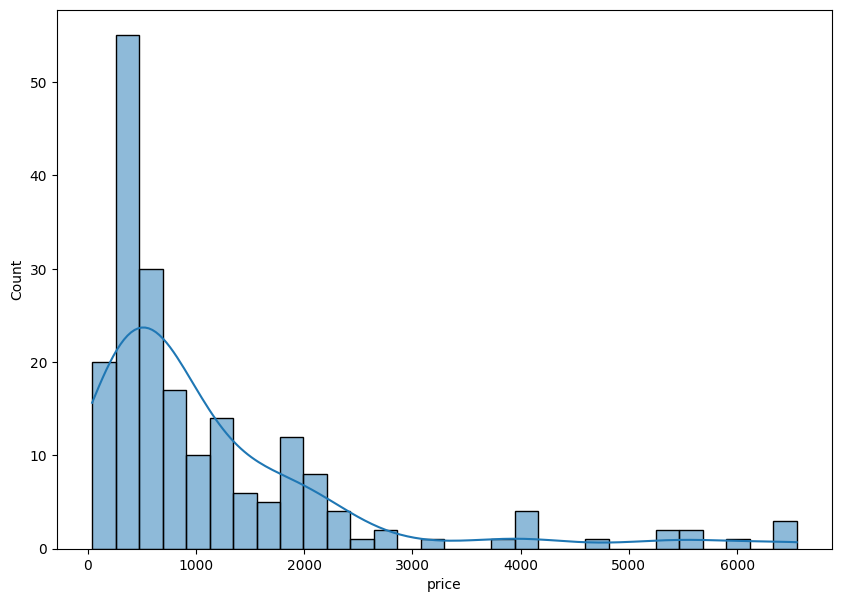

In [29]:
plt.rcParams['xtick.labelsize'] = 10
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='price',bins=30,kde=True)

<font size = "5">
    most of the prices are within 0 to 1000 ₹
    <br>
    <br>
</font>

<AxesSubplot:xlabel='weight', ylabel='Count'>

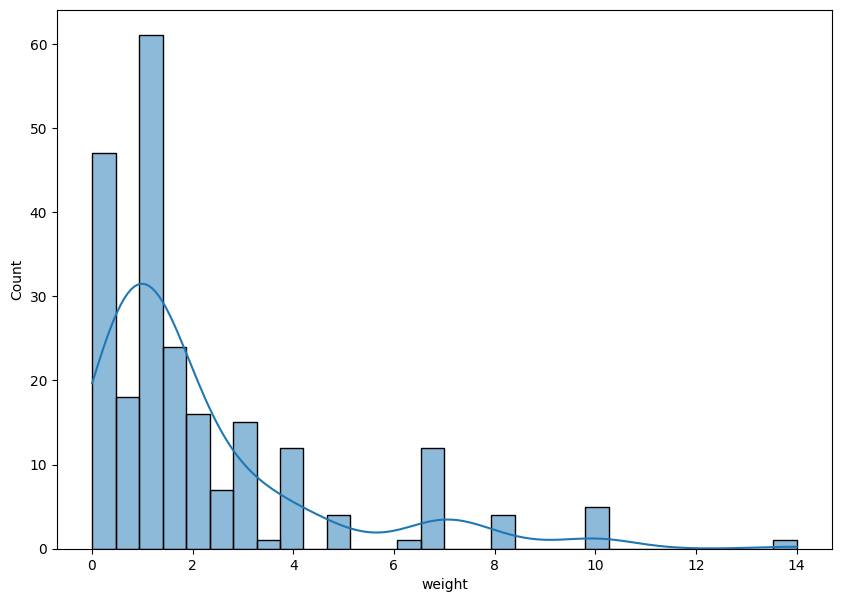

In [30]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='weight',bins=30,kde=True)

<font size = "5">
    Most products by weight are between 0 to 2 kg
    <br>
    <br>
    
    
</font>

totol dataset 228


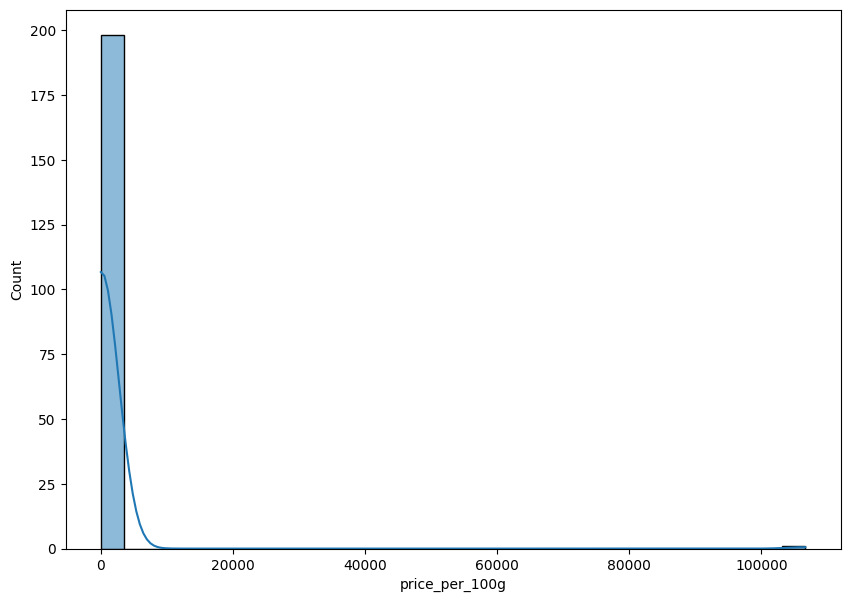

In [31]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='price_per_100g',bins=30,kde=True)
print('totol dataset',len(df))

<font size = "4">
    most products are within 0 to 1000 ₹ <br>
    
    
    
</font>

<AxesSubplot:xlabel='star_rating', ylabel='Count'>

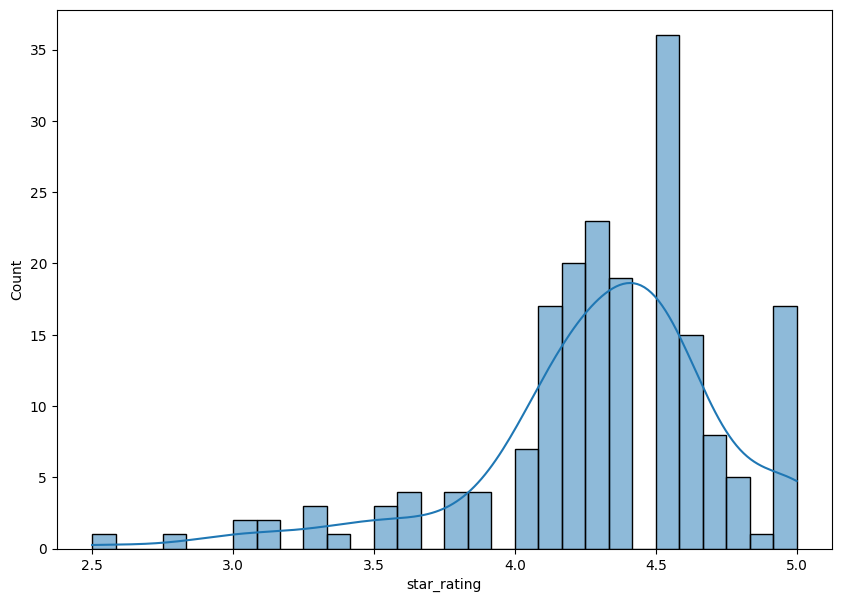

In [32]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='star_rating',bins=30,kde=True)

<font size = "4">
    star ratings are mostly between 3.7 - 5 <br>
    that also means that bad products are eventually discontinued after they are rated down. <br> <br>
    
        
    
</font>

(0.0, 5.0)

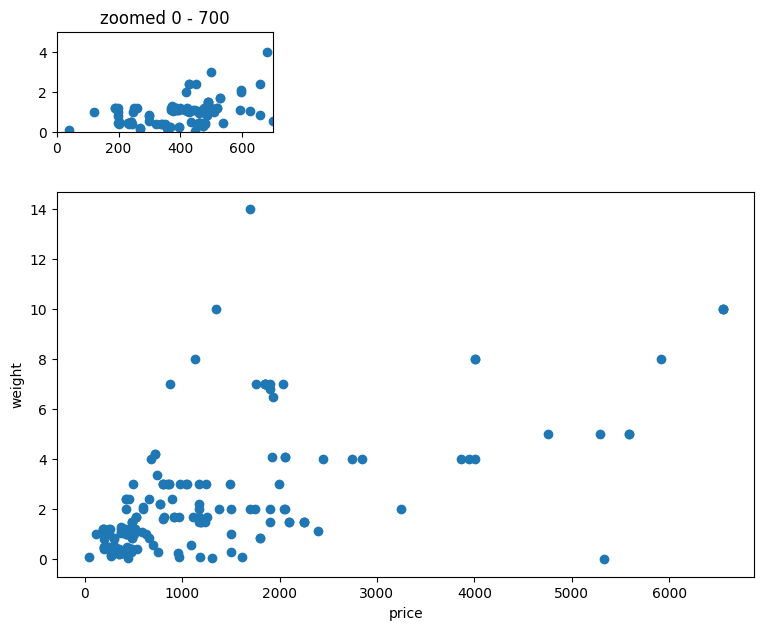

In [33]:
fig,ax = plt.subplots(figsize=(9,5))
ax.scatter(df['price'],df['weight'])
ax.set_xlabel('price')
ax.set_ylabel('weight')

zoomed = fig.add_axes([0.125,1,0.24,0.2])
zoomed.scatter(df['price'],df['weight'])
zoomed.set_title('zoomed 0 - 700')
zoomed.set_xlim(0,700)
zoomed.set_ylim(0,5)

# sns.scatterplot(data=df,x='price',y='weight')

<font size = "4">
    there is some corrolation between price and weight which makes sense as the more weight a product has, the more it cost to produce however the sign that it does not having strict corrolation also means that there are
    levels to quality of the product or an impressions of the same.
    
        
    
</font>

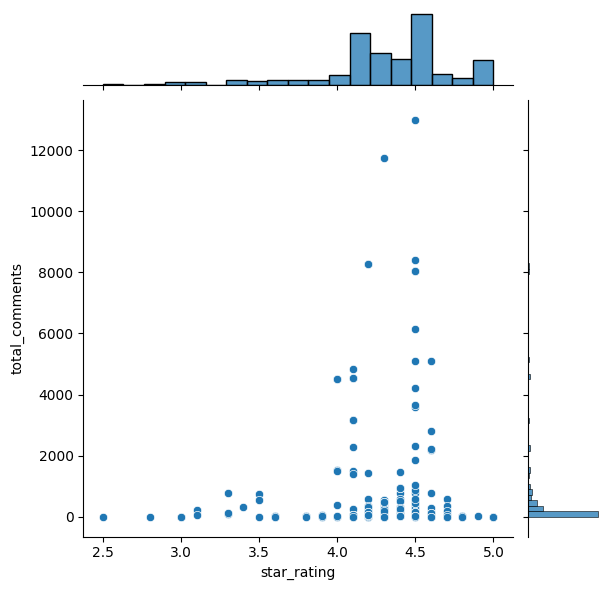

In [34]:
sns.jointplot(data=df,y='total_comments',x='star_rating')

<font size = "4">
  this graph tells us that if a product has more than 2000 comments then it is more likely to have 4 or more stars <br>
  vice-versa if a product has less than 4 star rating then it bound to have less than 2000 comments
</font> 

In [35]:
df['company'].unique()

array(['purepet', 'whiskas', 'drools', 'meat', "let's", 'sheba', 'royal',
       'me-o', 'farmina', 'puirna', 'kittibles', 'maxi', 'purina',
       'kitty', 'iams', 'kennel', 'heads', 'schesir', 'prodiet,',
       'matisse', 'meo', 'arden', 'generic', 'barkbutler', 'dynamicsales',
       'kit', 'nurture', 'lara', 'applaws', 'oem', 'purevita', 'halo',
       'pet', 'calibra', 'fins', 'wag', 'wiggles', 'wysong', 'fekrix',
       'choudhary', 'sk'], dtype=object)

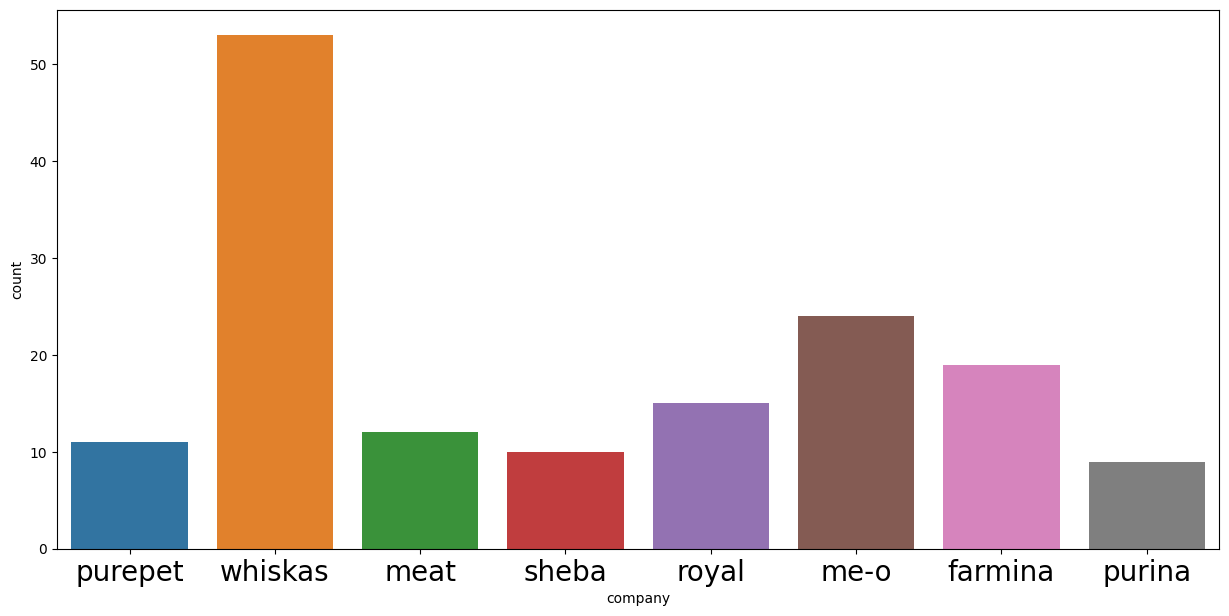

In [36]:
plt.figure(figsize=(15,7))
plt.rcParams['xtick.labelsize'] = 20
sns.countplot(data=df[df['company'].apply(lambda x: x in list(df['company'].value_counts()[:8].index))],x='company')
plt.savefig('companies_products')

<font size = "4">
    wiskers, farmina, royal, sheba, purepet, meat me, drools has the most number of products in the market. but it is different from most of the sales
    
</font>

In [37]:
df['company'].value_counts()

whiskas         53
me-o            24
farmina         19
royal           15
meat            12
purepet         11
sheba           10
purina           9
schesir          8
drools           6
prodiet,         5
kitty            4
iams             4
oem              3
applaws          3
generic          3
matisse          3
kennel           3
heads            3
let's            3
wysong           2
wag              2
dynamicsales     2
nurture          2
choudhary        2
pet              2
halo             1
wiggles          1
fekrix           1
fins             1
calibra          1
meo              1
purevita         1
lara             1
kit              1
barkbutler       1
arden            1
maxi             1
kittibles        1
puirna           1
sk               1
Name: company, dtype: int64

In [38]:
plt.rcParams['xtick.labelsize'] = 10

In [39]:
x = df[df['total_comments']> 500].groupby('company',as_index=False).mean()[['company','star_rating']].sort_values('star_rating',ascending=False)
x

,company,star_rating
1,farmina,4.525000
8,whiskas,4.489474
6,royal,4.471429
7,sheba,4.400000
0,drools,4.100000
2,let's,4.100000
3,maxi,4.000000
5,purepet,3.985714
4,meat,3.950000


<AxesSubplot:xlabel='company', ylabel='star_rating'>

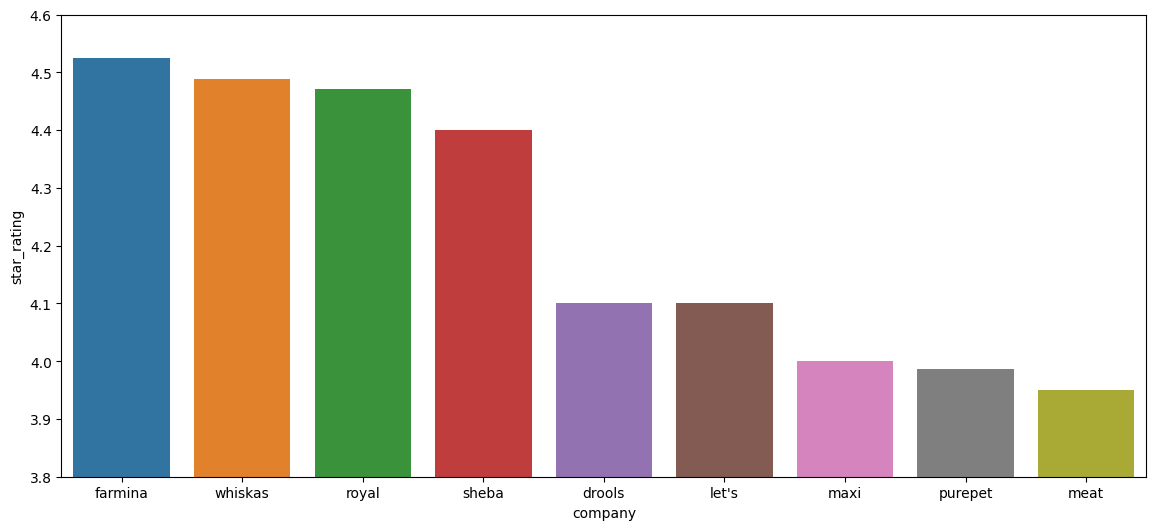

In [40]:
plt.figure(figsize=(14,6))
plt.ylim(3.8,4.6)
sns.barplot(data=x,x='company',y='star_rating')

In [41]:
x = df.groupby('company',as_index=False).sum()[['company','total_comments']].sort_values('total_comments',ascending=False)[:15]
x

,company,total_comments
38,whiskas,72573.0
30,purepet,32332.0
23,meat,17624.0
33,royal,16061.0
5,drools,11796.0
19,let's,7716.0
22,me-o,4446.0
7,farmina,4224.0
35,sheba,2619.0
21,maxi,1540.0


<AxesSubplot:xlabel='company', ylabel='total_comments'>

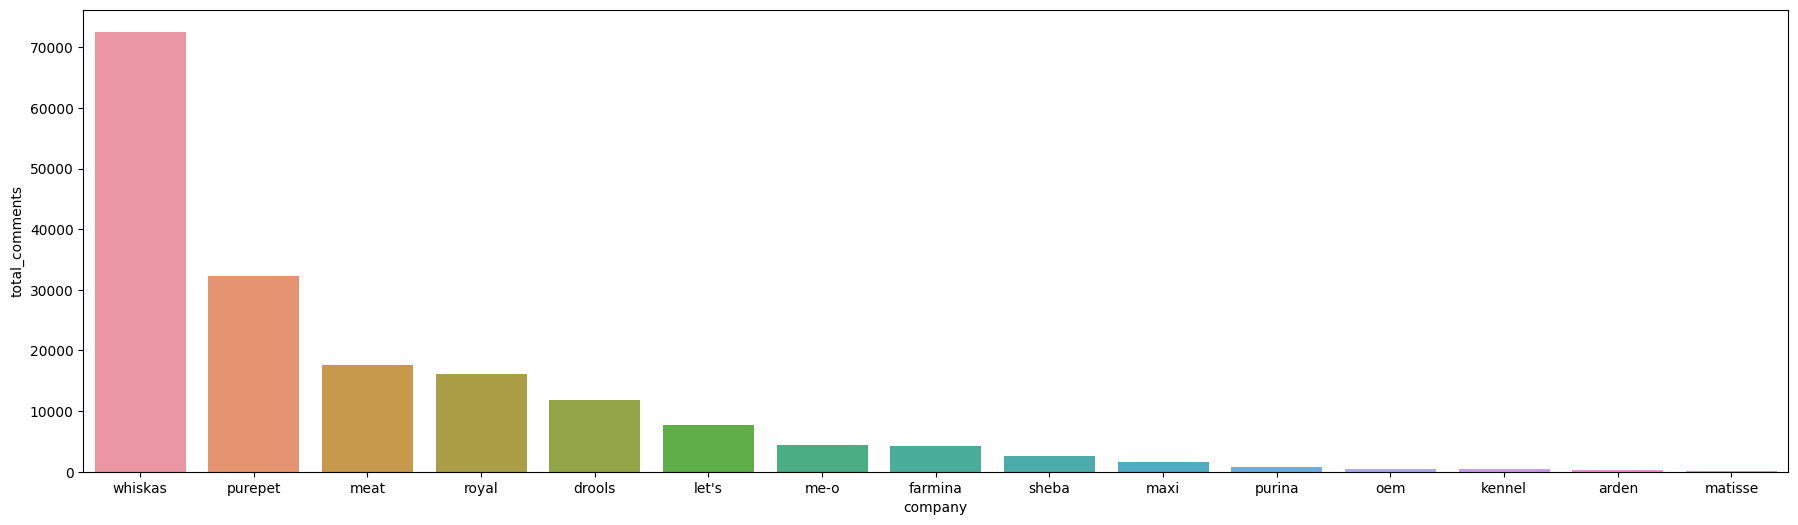

In [42]:
plt.figure(figsize=(22,6))
sns.barplot(data=x,x='company',y='total_comments')

<font size = '4'>
we have added a filter to the list and reduced the products to those one which has more than 500 comments as it is very much possible that some products which sell very little and have higher star count<br><br>
we can see this in sum of all comments table, where whiskas sells most of the products, ie. 85000+ yet in star rating it is on par with famina which sells less than 5000 total units.
</font>

In [43]:
df.groupby('company',as_index=False).mean()[['company','price_per_100g']].sort_values('price_per_100g',ascending=True)

,company,price_per_100g
21,maxi,12.135714
19,let's,18.958333
39,wiggles,20.950000
36,sk,21.583333
30,purepet,24.226082
16,kittibles,24.600000
5,drools,26.513925
22,me-o,33.925861
28,"prodiet,",35.600000
23,meat,39.165099


In [44]:
df_copy = df['company'].apply(lambda x:1)
df_copy = pd.concat([df['company'],df_copy],axis=1)
df_copy.columns = ['company','num']

In [45]:
df_copy.groupby(by='company',as_index=False).sum().sort_values(by='num',ascending=False)[:10]

,company,num
38,whiskas,53
22,me-o,24
7,farmina,19
33,royal,15
23,meat,12
30,purepet,11
35,sheba,10
32,purina,9
34,schesir,8
5,drools,6


In [46]:
df.groupby('company',as_index=False).sum()[['company','total_comments']].sort_values('total_comments',ascending=False)

,company,total_comments
38,whiskas,72573.0
30,purepet,32332.0
23,meat,17624.0
33,royal,16061.0
5,drools,11796.0
19,let's,7716.0
22,me-o,4446.0
7,farmina,4224.0
35,sheba,2619.0
21,maxi,1540.0


<font size = "4">
    although brands like farmina, sheba or meo have most products on amazon, most comments are on purpet, wiskers, royal, meat me and drools. more comments also indicates they are selling more.
    <br>
    
therefore it is better to stick with the later list of companies.
    <br> <br>
    
        
    
</font>

<BarContainer object of 228 artists>

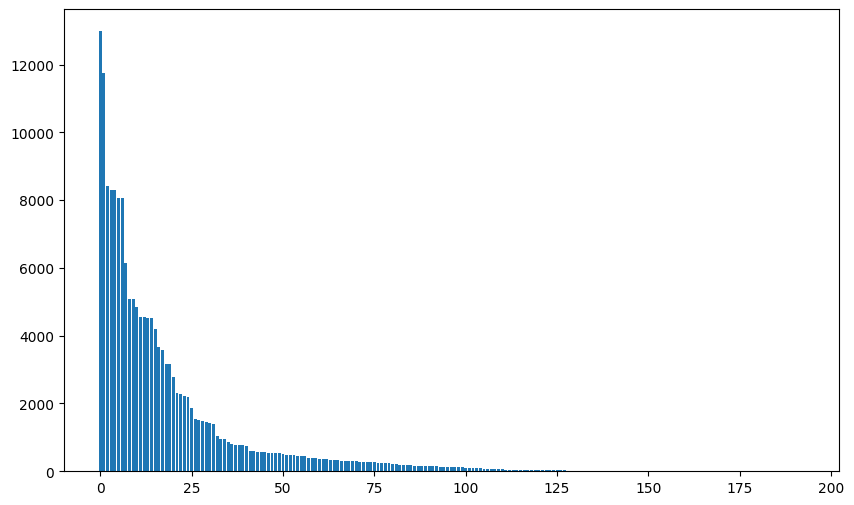

In [47]:
x = pd.DataFrame([range(len(df)),df['total_comments'].sort_values(ascending=False)]).T
x.columns = ['num','comments']

plt.figure(figsize=(10,6))
plt.bar(x['num'],x['comments'])

In [48]:
x = df['total_comments'].sort_values(ascending=False)

for i in range(0,len(df)-150,5):
    if i == 0:
        pass
    else:
        print(i,'  :  ',round(x[0:i].sum() / x.sum(),3))
    

5   :   0.286
10   :   0.473
15   :   0.605
20   :   0.708
25   :   0.776
30   :   0.821
35   :   0.854
40   :   0.877
45   :   0.895
50   :   0.911
55   :   0.925
60   :   0.936
65   :   0.946
70   :   0.955
75   :   0.963


In [49]:
x_add = []
c = x.sum()

for i,n in zip(x,range(len(x))):
    if n == 0:
        x_add.append(x[0].sum() / c)
    elif np.isnan(n) == False:
        x_add.append(x[0:n].sum() / c)
    elif np.isnan(n) == True:
        x_add.append(np.nan)

([<matplotlib.axis.XTick at 0xffff6cb86700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

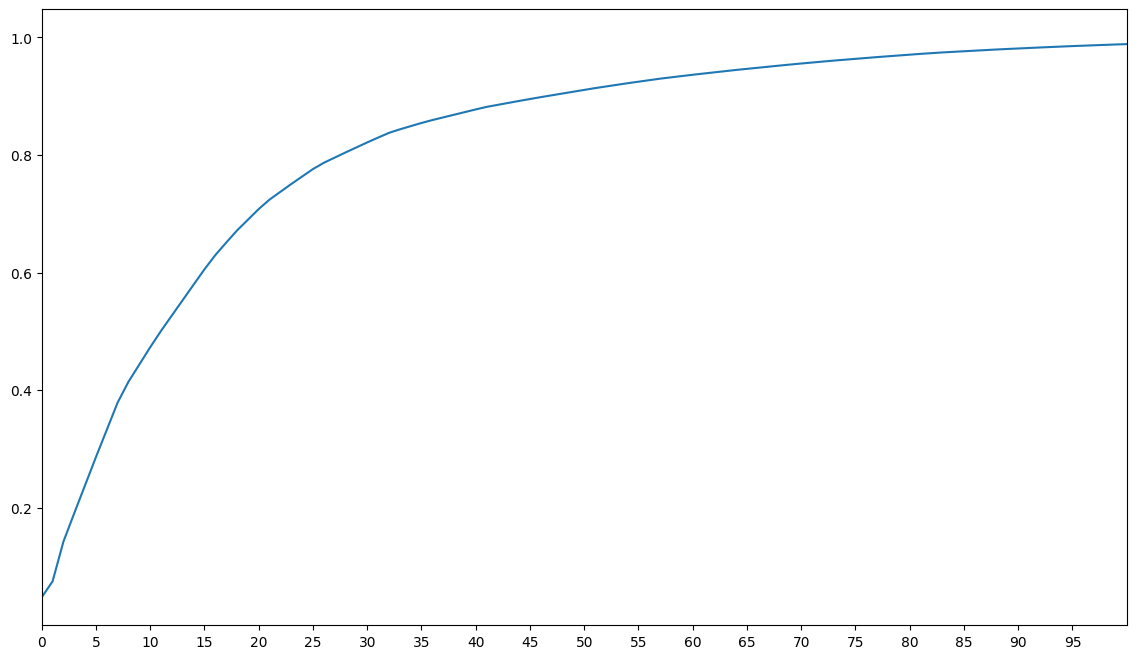

In [50]:
plt.figure(figsize=(14,8))
plt.plot(x_add)
plt.xlim(0,100)
plt.xticks(range(0,100,5))

In [51]:
print('12 products out of',len(x),'sell',round(x[:12].sum() / x.sum(),2),'%')
print('30 products out of',len(x),'sell',round(x[:30].sum() / x.sum(),2),'%')

12 products out of 228 sell 0.53 %
30 products out of 228 sell 0.82 %


<font size = "4">
    just 12 products out of 254 has 50% of the comments ie. they sell the most. And 30 products have 80% comments
</font>

In [52]:
top_5_list = ['purepet','whiskas','royal','meat','drools']
top_5 = df[df['company'].isin(top_5_list)]

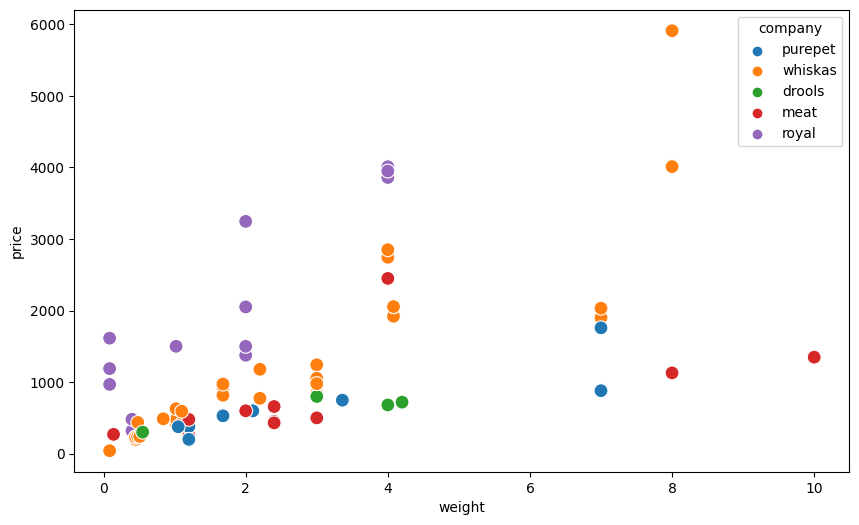

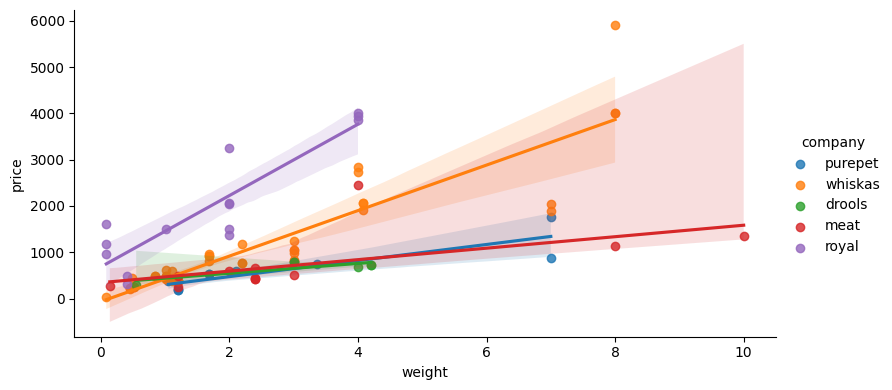

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=top_5,x='weight',y='price',hue='company',s=100)
sns.lmplot(data=top_5,x='weight',y='price',hue='company',height=4,aspect=2)

<font size = "4">
    royal company has the most expensive product in the market. on the other hand purepet and meat me offer value for money products. <br> <br>

</font>

<AxesSubplot:xlabel='weight', ylabel='total_comments'>

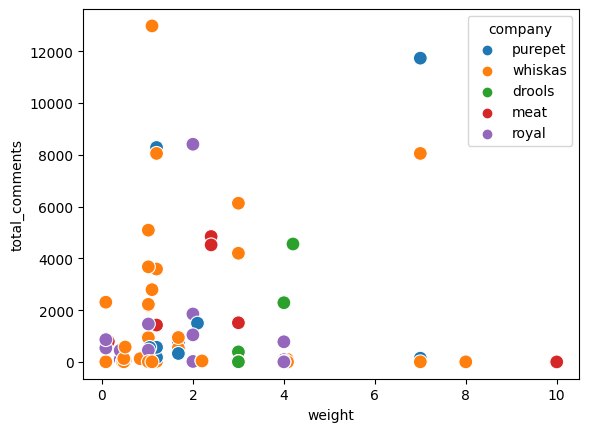

In [54]:
sns.scatterplot(data=top_5,x='weight',y='total_comments',hue='company',s=100)

<font size = '4'>
most products are saturated between 1-2 kg
</font>

Text(0.5, 1.0, 'price_per_100g')

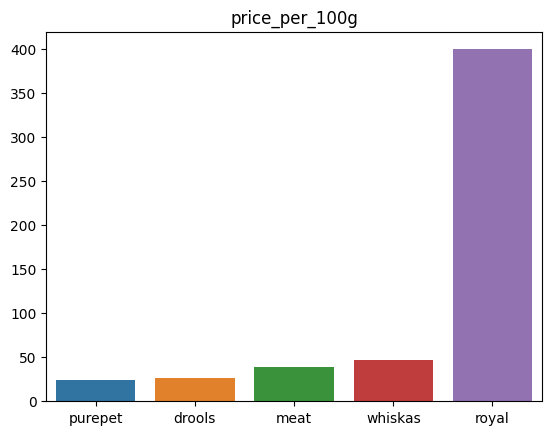

In [55]:
x = pd.DataFrame(top_5.groupby('company').mean().sort_values('price_per_100g')['price_per_100g'])

ax = sns.barplot(x=x.index.values,y=x['price_per_100g'].values)
ax.set_title('price_per_100g')

<font size = '4'>
royal is truely royal with the prices!
</font>

<AxesSubplot:xlabel='price', ylabel='total_comments'>

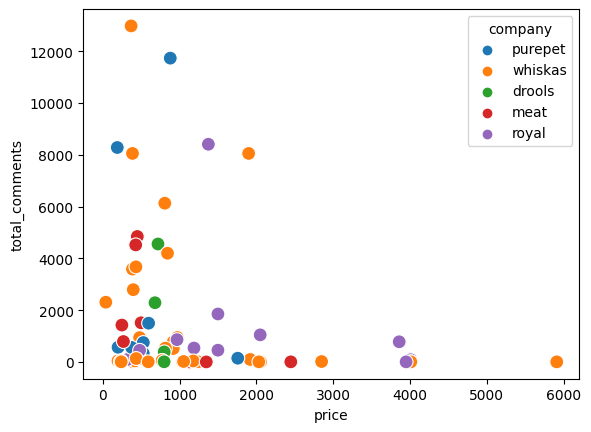

In [56]:
sns.scatterplot(data=top_5,x='price',y='total_comments',hue='company',s=100)

<font size = '4'>
most products sold are between 300 - 2000
</font>

In [57]:
import matplotlib.pyplot as plt
palette=plt.get_cmap('rocket').reversed()

<AxesSubplot:title={'center':'weight, price and total comments'}, xlabel='weight', ylabel='price'>

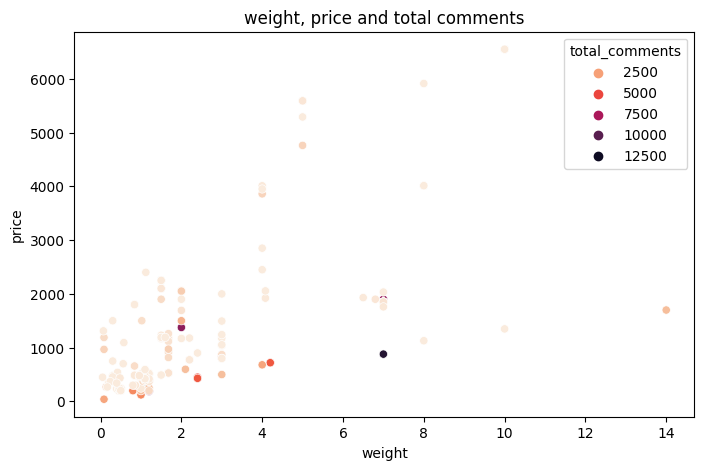

In [58]:
plt.figure(figsize=(8,5))
plt.title('weight, price and total comments')
sns.scatterplot(data=df,x='weight',y='price',hue='total_comments',palette=palette)

In [59]:
x = df[['weight','price','total_comments']].copy()
x.head()

y = []
for i in x['weight']:
    if i > 0 and i <= 1:
        y.append('1')
    elif i > 1 and i <= 2:
        y.append('2')
    elif i > 2 and i <= 3:
        y.append('3')
    elif i > 3 and i <= 6:    
        y.append('3-6')
    elif i > 6:
        y.append('6+')
    else:
        y.append(np.nan)
        
x['weight_label'] = y

In [60]:
x.head()

,weight,price,total_comments,weight_label
0,1.2,189.0,8285.0,2
2,7.0,879.0,11737.0,6+
3,7.0,1900.0,8056.0,6+
4,1.2,189.0,8285.0,2
5,4.2,719.0,4557.0,3-6


<AxesSubplot:xlabel='weight_label', ylabel='total_comments'>

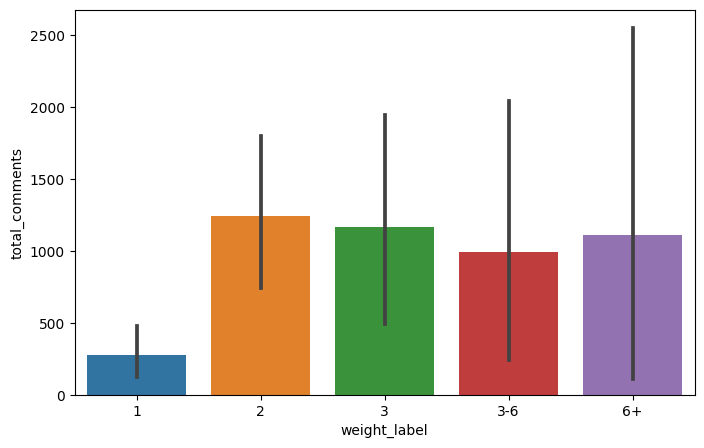

In [61]:
plt.figure(figsize=(8,5))

sns.barplot(data=x,x='weight_label',y='total_comments',order=['1','2','3','3-6','6+'])

<AxesSubplot:xlabel='weight_label', ylabel='count'>

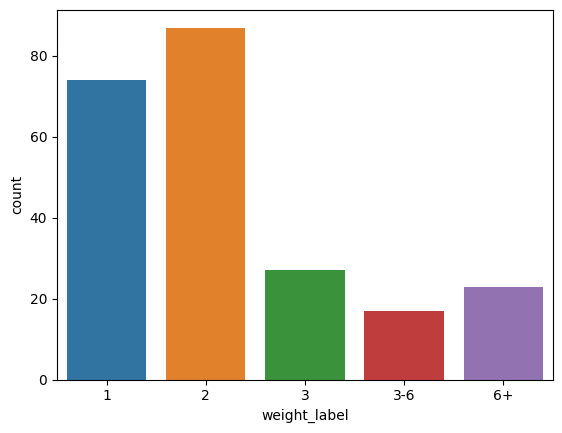

In [62]:
sns.countplot(data=x,x='weight_label',order=['1','2','3','3-6','6+'])

<font size = '4'>
1) as we have seen earlier only handful of products sell the most, which is very visible on the weight, price and total comments graph.<br>
2) although most products are for 1-2 kg, the most products sold are over 2-3 kg weight.
</font>

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 270
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   products        228 non-null    object 
 1   company         228 non-null    object 
 2   price           199 non-null    float64
 3   weight          228 non-null    float64
 4   star_rating     193 non-null    float64
 5   total_comments  193 non-null    float64
 6   flavours        228 non-null    object 
 7   price_per_100g  199 non-null    float64
dtypes: float64(5), object(3)
memory usage: 16.0+ KB


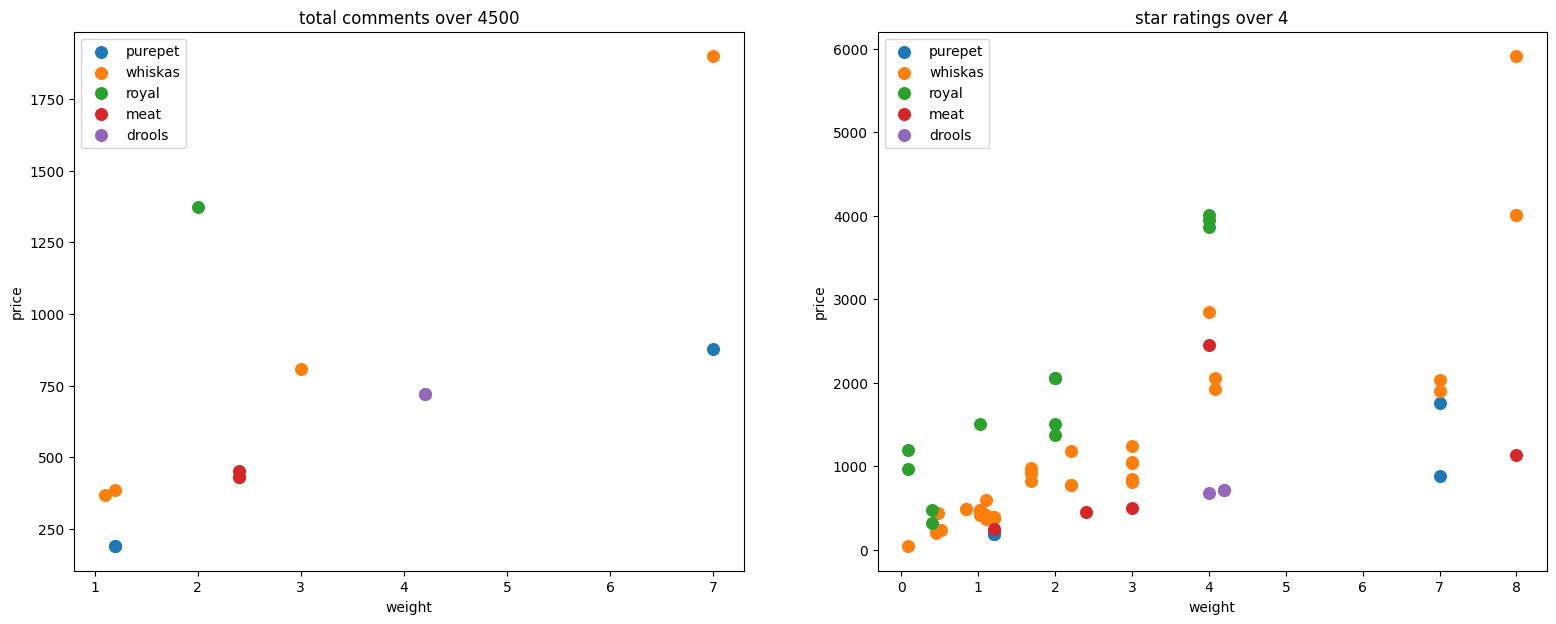

In [64]:
fig,axes= plt.subplots(ncols=2,figsize=(19,7))

for com in top_5_list:
    
    x = df[(df['company']==com)&(df['total_comments']>4500)]
    
    axes[0].scatter(x['weight'],x['price'],label=com,s=70)
    axes[0].legend()
    axes[0].set_title('total comments over 4500')
    axes[0].set_xlabel('weight')
    axes[0].set_ylabel('price')
    
    
    
    x = df[(df['company']==com)&(df['star_rating']>4)]
    
    axes[1].scatter(x['weight'],x['price'],label=com,s=70)
    axes[1].legend()
    axes[1].set_title('star ratings over 4')
    axes[1].set_xlabel('weight')
    axes[1].set_ylabel('price')

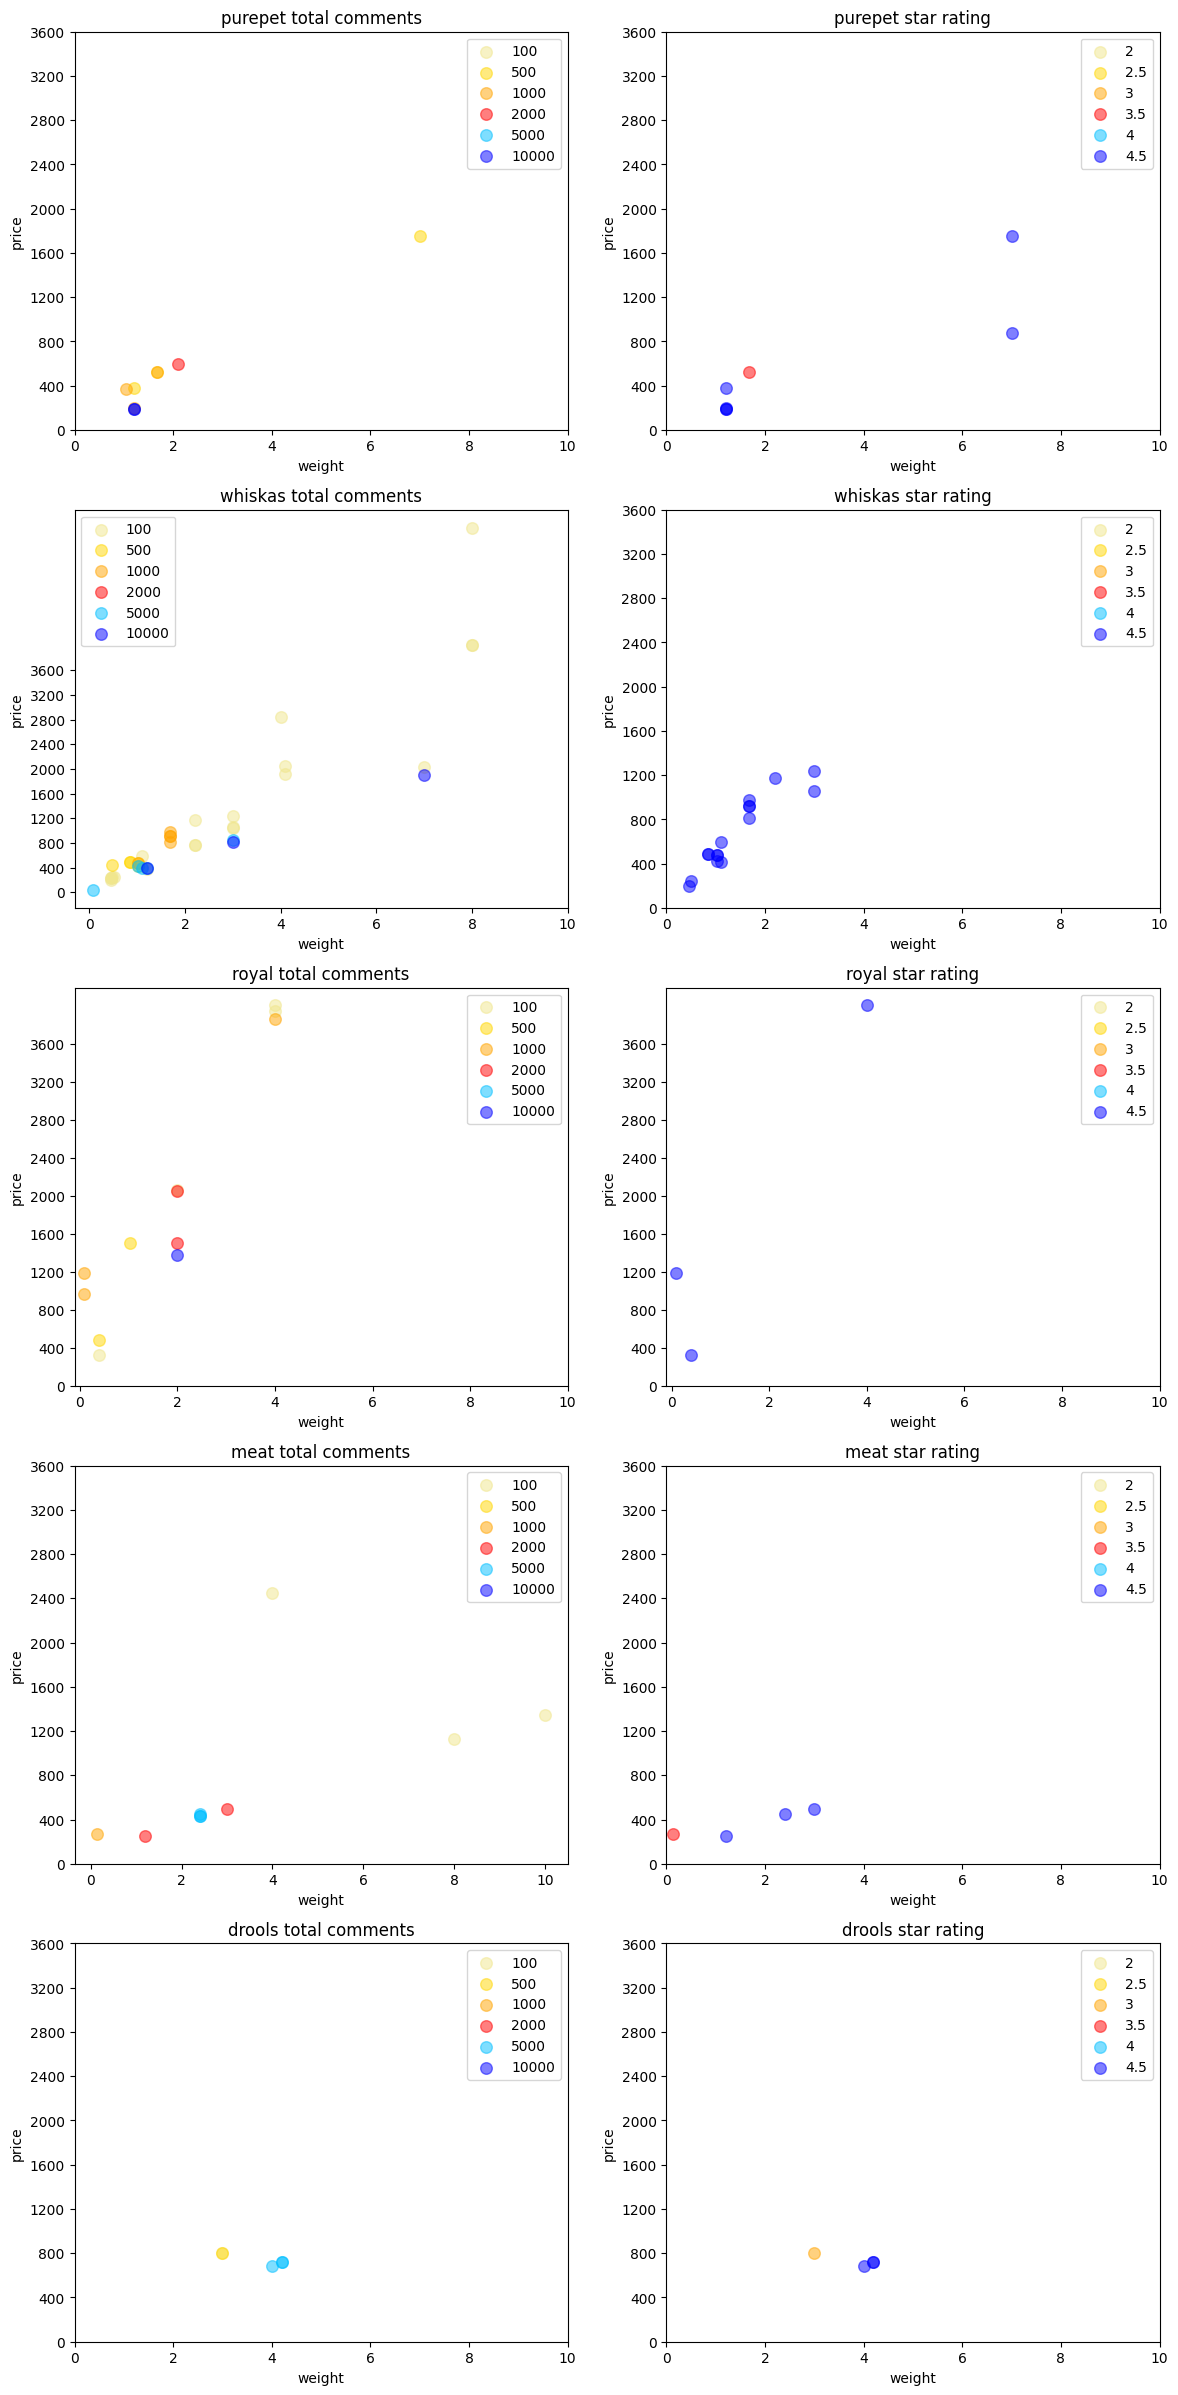

In [65]:
fig,axes= plt.subplots(nrows=5,ncols=2,figsize=(14,30))

for com,ax in zip(top_5_list,axes):
    m = 0
    n = 0
    b=-1
    colour = ['blue','deepskyblue','red','orange','gold','khaki']
    
    for lab,star in zip([100,500,1000,2000,5000,10000],[2,2.5,3,3.5,4,4.5]):
        x = df[(df['company']==com)&(df['total_comments']>m)&(df['total_comments']<lab)]
        ax[0].scatter(x['weight'],x['price'],label=str(lab),c=colour[b],s=70,alpha=0.5)
        ax[0].legend()
        ax[0].set_title(com+' total comments')
        ax[0].set_xlabel('weight')
        ax[0].set_ylabel('price')
        ax[0].set_yticks(range(0,4000,400))
        ax[0].set_xticks(range(0,12,2))
        
        m = lab
        
        x = df[(df['company']==com)&(df['star_rating']>n)&(df['star_rating']<star)]
        ax[1].scatter(x['weight'],x['price'],label=str(star),c=colour[b],s=70,alpha=0.5)
        ax[1].legend()
        ax[1].set_title(com+' star rating')
        ax[1].set_xlabel('weight')
        ax[1].set_ylabel('price')
        ax[1].set_yticks(range(0,4000,400))
        ax[1].set_xticks(range(0,12,2))
        
        
        n = star
        
        b-=1
    

In [66]:
max_len = 0
for i in df['flavours']:
    if len(i) > max_len:
        max_len = len(i)
max_len

7

In [67]:
list(flavours['name'])

['Dry',
 'Adult',
 'Fish',
 'Tuna',
 'Chicken',
 'Ocean',
 'Kitten',
 'Wet',
 'Gravy',
 'Salmon',
 'Mackerel',
 'Grain',
 'Sea',
 'Schesir',
 'Persian',
 'Canin',
 'Jelly',
 'Seafood',
 'Meat',
 'Matisse',
 'FRISKIES',
 'Grain-Free',
 'Milk']

In [68]:
df.reset_index(inplace=True)

In [69]:
df['per_kg_sell'] = round((df['total_comments'] * df['price']) / df['weight'],2)

/tmp/ipykernel_128659/2919362295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['per_kg_sell'] = round((df['total_comments'] * df['price']) / df['weight'],2)


In [70]:
df.head()

,index,products,company,price,weight,star_rating,total_comments,flavours,price_per_100g,per_kg_sell
0,0,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"[Dry, Adult, Mackerel]",15.750000,1304887.50
1,2,"Purepet Adult(+1 Year) Dry Cat Food, Ocean Fis...",purepet,879.0,7.0,4.3,11737.0,"[Dry, Adult, Fish, Ocean]",12.557143,1473831.86
2,3,"Whiskas Dry Food for Adult Cats (+1 Years), Oc...",whiskas,1900.0,7.0,4.5,8056.0,"[Dry, Adult, Fish, Ocean]",27.142857,2186628.57
3,4,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"[Dry, Adult, Mackerel]",15.750000,1304887.50
4,5,"Drools Adult(+1 year) Dry Cat Food, Ocean Fish...",drools,719.0,4.2,4.1,4557.0,"[Dry, Adult, Fish, Ocean]",17.119048,780115.00


In [71]:
x = df[['company','per_kg_sell']].groupby('company',as_index=False).mean().sort_values(by='per_kg_sell',ascending=False)
x['per_kg_sell'] = round(x['per_kg_sell'],2)
x

,company,per_kg_sell
33,royal,2309476.58
30,purepet,523446.58
23,meat,510167.70
38,whiskas,488836.14
19,let's,482014.83
5,drools,410850.93
35,sheba,253185.43
7,farmina,252202.20
1,arden,220806.00
21,maxi,186890.00


Text(0, 0.5, 'per_kg_sell (in millions ₹)')

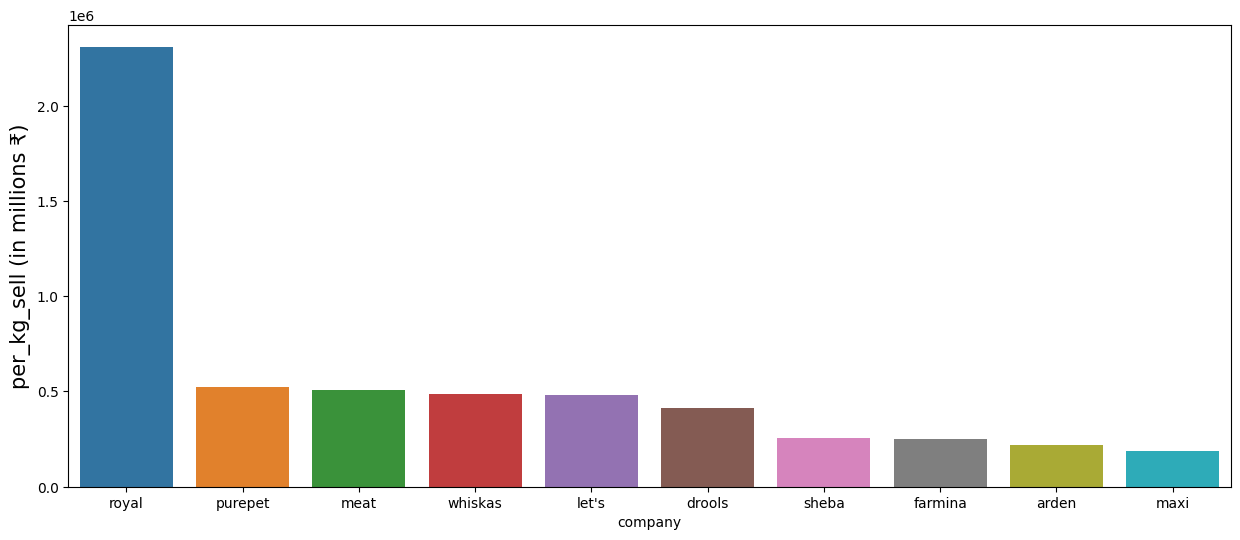

In [72]:
plt.figure(figsize=(15,6))
sns.barplot(data=x[:10],x='company',y='per_kg_sell')
plt.ylabel('per_kg_sell (in millions ₹)',fontdict={'fontsize':15})

<font size = '4'>
Royal charges 3-4 times more per kg than any other leading company
</font>

In [73]:
df.head()

,index,products,company,price,weight,star_rating,total_comments,flavours,price_per_100g,per_kg_sell
0,0,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"[Dry, Adult, Mackerel]",15.750000,1304887.50
1,2,"Purepet Adult(+1 Year) Dry Cat Food, Ocean Fis...",purepet,879.0,7.0,4.3,11737.0,"[Dry, Adult, Fish, Ocean]",12.557143,1473831.86
2,3,"Whiskas Dry Food for Adult Cats (+1 Years), Oc...",whiskas,1900.0,7.0,4.5,8056.0,"[Dry, Adult, Fish, Ocean]",27.142857,2186628.57
3,4,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"[Dry, Adult, Mackerel]",15.750000,1304887.50
4,5,"Drools Adult(+1 year) Dry Cat Food, Ocean Fish...",drools,719.0,4.2,4.1,4557.0,"[Dry, Adult, Fish, Ocean]",17.119048,780115.00


In [74]:
def flavor_mine(x,company=df['company']):
    drop = ['and','or','for','kg','g','gram','grams','cat','food','in','x','get',
           'of','all','no','pack','inc','with','free','small','bite','cats','coat',
            'prime','feast','extra','life','stages','fine','buy','love','from'
           ]
    y = []
    for i in x.split():
        if ',' in i:
            i = i.split(',')[0]
        
        if '(' in i:
            i = i.split('(')[0]
        
        is_num = False
        for num in i:
            if num in [ii for ii in '1234567890.&-+[_%:|']:
                is_num = True
        
        if len(i) > 2:
        
            if is_num == True or i[-1] in [')'] or i.lower() in [ii.lower() for ii in company] or i.lower() in drop:
                pass

            else:
                y.append(i)
        
        
    return y

In [75]:
x = df['products'].apply(flavor_mine)
x

0                                 [Mackerel, Adult, Dry]
1                              [Adult, Dry, Ocean, Fish]
2                     [Dry, Adult, Ocean, Fish, Flavour]
3                                 [Mackerel, Adult, Dry]
4                              [Adult, Dry, Ocean, Fish]
                             ...                        
223    [Kitten, Dry, Mackerel, Flavour, Kitten, Dry, ...
224                                 [Enterprises, Adult]
225    [Dry, Kitten, Adult, Salmon, Turkey, Chicken, ...
226                        [SHOPOcean, Fish, Adult, Dry]
227                     [Urinary, Feline, Struvite, Dry]
Name: products, Length: 228, dtype: object

In [76]:
y = []
for i in x:
    for ii in i:
        if ii not in y:
            y.append(ii)
y

['Mackerel',
 'Adult',
 'Dry',
 'Ocean',
 'Fish',
 'Flavour',
 'Active',
 'Persian',
 'Kittens',
 'Tuna',
 'Chicken',
 'Kitten',
 'Wet',
 'Gravy',
 'Pouches',
 'Healthy',
 'Skin',
 'Salmon',
 'pouches',
 'Tasty',
 'Mix',
 'Made',
 'Real',
 'Wakame',
 'Seaweed',
 'Jelly',
 'Adults',
 'Liver',
 'Kanikama',
 'Carrot',
 'Seafood',
 'Cocktail',
 'Canin',
 'Fit',
 'Grilled',
 'Saba',
 'Supports',
 'Hairball',
 'Control',
 'Pumpkin',
 'Grain',
 'Pomegranate',
 'Fancy',
 'Flakes',
 'Cans',
 'Can',
 'Ashwagandha',
 'Rosemary',
 'Extract',
 'FRISKIES',
 'Sensations',
 'Whitefish',
 'Cran',
 'Shrimp',
 'Flavours',
 'Combo',
 'Yums',
 'Proactive',
 'Health',
 'Premium',
 'Mother',
 'Foods',
 'Rice',
 'Skipjack',
 'Sasami',
 'Sea',
 'Medley',
 'Mutton',
 'Biscuit',
 'Discoveries',
 'Baby',
 'Milk',
 'Vegetables',
 'Whole',
 'Chunks',
 'Luscious',
 'Indoor',
 'Loaf',
 'Vegetable',
 'Intense',
 'Beauty',
 'SeaFood',
 'Herring',
 'Orange',
 'Lamb',
 'Blueberry',
 'Kitchen',
 'Tails',
 'Shrimps',
 'Pou

adult     | kitten <br>
chicken   | <br>
dry       |	wet	<br>
<br>
fish ,tuna, salmon, mackerel, shrimps<br>
<br>
tuna      <br>
salmon  <br>
mackerel  <br>
shrimps  <br>
<br>
milk  <br>
<br>
can / container |  <br>
<br>
gravy  <br>
pouches pouch <br>
liver     |  <br>
<br>
grilled  <br>
turkey  <br>
<br>
ham  <br>
<br>


vegetarian, carrot, grains, Pomegranate, rice, Vegetables Blueberry potato coconut, pumpkin  <br>
<br>
carrot <br>
grains <br>
Pomegranate <br>
<br>
rice <br>
<br>
<br>
Vegetables <br>
Blueberry <br>
potato <br>
coconut<br>
pumpkin <br>
<br>



In [77]:
flavours_list = [
    ['or','adult','kitten'],['chicken'], ['or','dry','wet'], ['fish','tuna', 'salmon', 'mackerel', 'shrimps'],
    ['fish'],['tuna'],['salmon'],['mackerel'],['shrimps'], ['milk'], ['can','container'],
    ['gravy'], ['pouches', 'pouch'], ['liver'] , ['grilled'], ['turkey'], ['ham '], 
    ['vegetarian', 'carrot', 'grain', 'pomegranate', 'rice', 'vegetables', 'Blueberry', 'potato', 'coconut', 'pumpkin'],
    ]

In [78]:
flavour_names = ['adult','chicken','wet','from_oceon','fish','tuna', 'salmon', 'mackerel', 'shrimps','milk','can',
                'gravy','pouch','liver','grilled','turkey','ham','vegan']

In [79]:
len(flavours_list),len(flavour_names)

(18, 18)

In [80]:
df.reset_index(inplace=True)

In [81]:
flavours_col = pd.DataFrame(columns=flavour_names)

for name in df['products']:
    row = []
    
    for flavor in flavours_list:
        cross_compare = False
        if flavor[0] == 'or':
            cross_compare = True
            
        if cross_compare == True and len(flavor)>1:
            if flavor[1].lower() in name.lower():
                row.append(1)
            elif flavor[2].lower() in name.lower():
                row.append(0.5)
            else:
                row.append(0)
            
            
        elif cross_compare == False and len(flavor)>1:
            list_pos = False
            for i in flavor:
                if i.lower() in name.lower():
                    list_pos = True
                    
            if list_pos == True:
                row.append(1)
                
            else:
                row.append(0)
        
        else:
                
            if flavor[0].lower() in name.lower():
                row.append(1)
            else:
                row.append(0)
    
    
    flavours_col.loc[len(flavours_col)] = row
    
        


In [82]:
for col in flavours_col.columns:
    x = 14-len(col)
    print(col,' '*x,'\n',flavours_col[col].value_counts(),'\n')

adult           
 1.0    129
0.0     56
0.5     43
Name: adult, dtype: int64 

chicken         
 0.0    163
1.0     65
Name: chicken, dtype: int64 

wet             
 1.0    115
0.5     58
0.0     55
Name: wet, dtype: int64 

from_oceon      
 1.0    144
0.0     84
Name: from_oceon, dtype: int64 

fish            
 0.0    163
1.0     65
Name: fish, dtype: int64 

tuna            
 0.0    166
1.0     62
Name: tuna, dtype: int64 

salmon          
 0.0    202
1.0     26
Name: salmon, dtype: int64 

mackerel        
 0.0    202
1.0     26
Name: mackerel, dtype: int64 

shrimps         
 0.0    227
1.0      1
Name: shrimps, dtype: int64 

milk            
 0.0    221
1.0      7
Name: milk, dtype: int64 

can             
 0.0    202
1.0     26
Name: can, dtype: int64 

gravy           
 0.0    197
1.0     31
Name: gravy, dtype: int64 

pouch           
 0.0    193
1.0     35
Name: pouch, dtype: int64 

liver           
 0.0    221
1.0      7
Name: liver, dtype: int64 

grilled         
 0.

<AxesSubplot:>

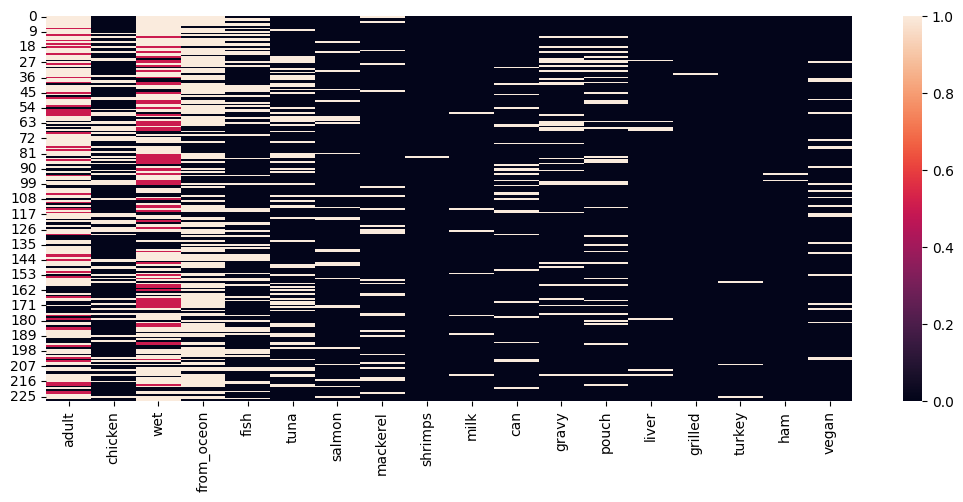

In [83]:
plt.figure(figsize=(13,5))
sns.heatmap(flavours_col)

<font size = '4'>
the categorisation of Adult, Chicken, wet food and from ocean are the most prevelent ones.
</font>

In [84]:
final_df = pd.concat([df,flavours_col],axis=1,)

In [85]:
final_df.drop(columns=['level_0','index'],inplace=True)
final_df.head()

,products,company,price,weight,star_rating,total_comments,flavours,price_per_100g,per_kg_sell,adult,...,shrimps,milk,can,gravy,pouch,liver,grilled,turkey,ham,vegan
0,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"[Dry, Adult, Mackerel]",15.750000,1304887.50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Purepet Adult(+1 Year) Dry Cat Food, Ocean Fis...",purepet,879.0,7.0,4.3,11737.0,"[Dry, Adult, Fish, Ocean]",12.557143,1473831.86,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Whiskas Dry Food for Adult Cats (+1 Years), Oc...",whiskas,1900.0,7.0,4.5,8056.0,"[Dry, Adult, Fish, Ocean]",27.142857,2186628.57,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"[Dry, Adult, Mackerel]",15.750000,1304887.50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Drools Adult(+1 year) Dry Cat Food, Ocean Fish...",drools,719.0,4.2,4.1,4557.0,"[Dry, Adult, Fish, Ocean]",17.119048,780115.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


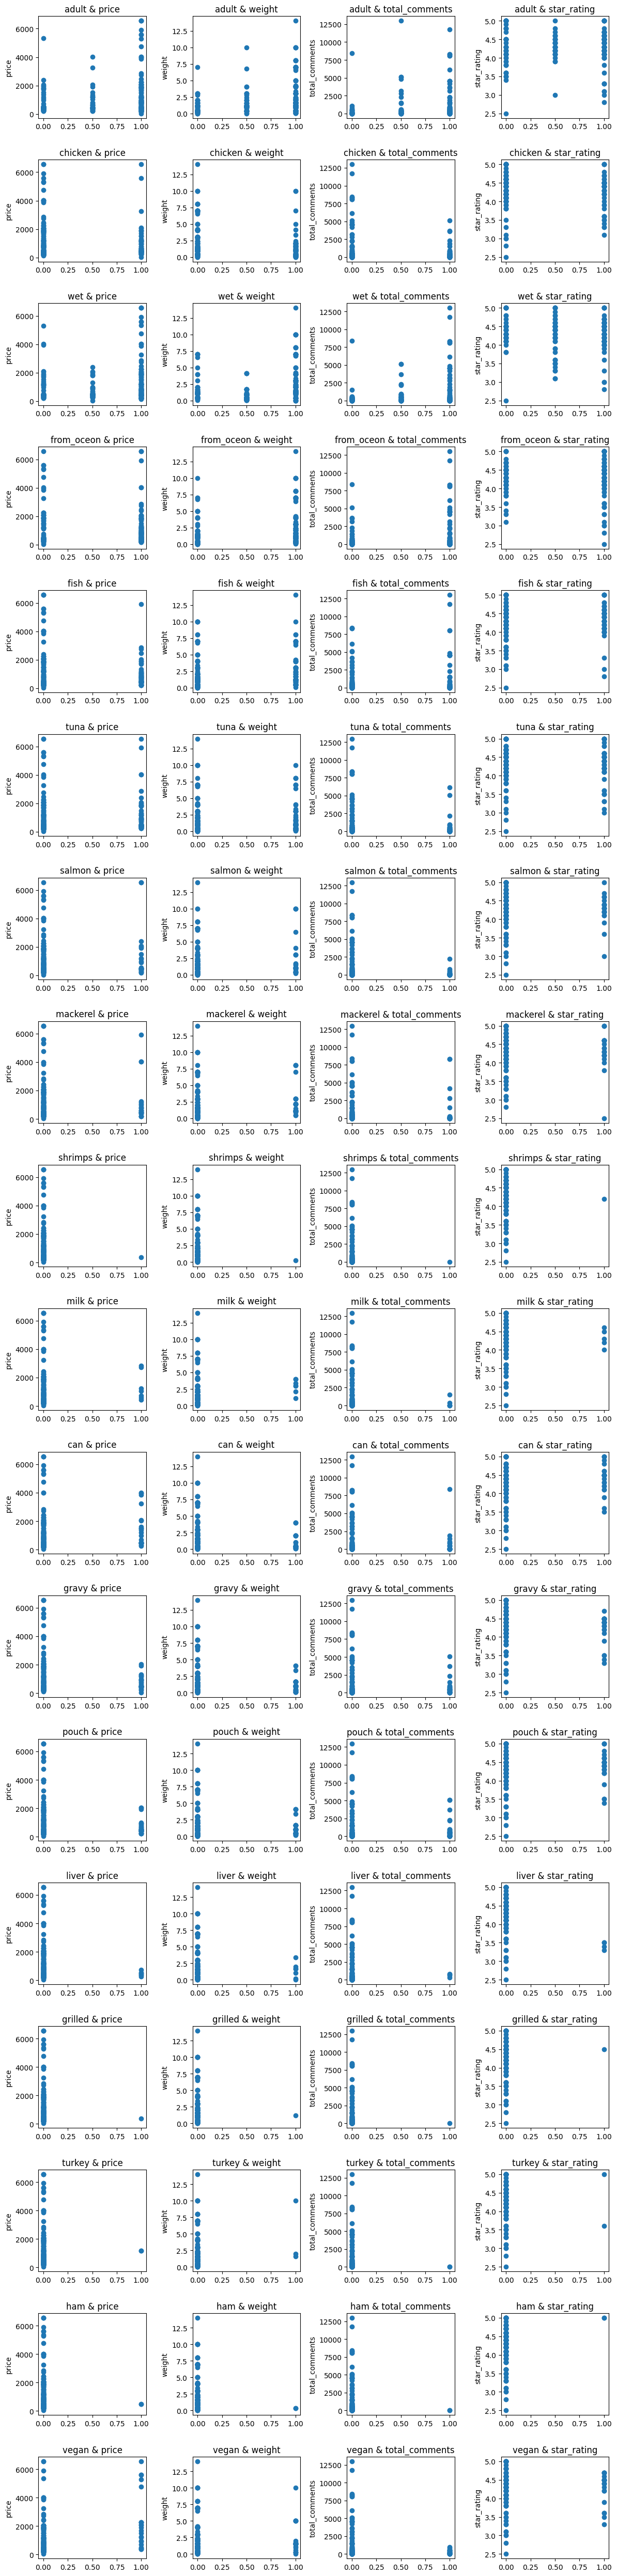

In [86]:
fig, axes = plt.subplots(nrows=len(flavour_names),ncols=4,figsize=(12,50))
for flav,ax in zip(flavour_names,axes):
    
    ax[0].scatter(final_df[flav],final_df['price'])
    ax[0].set_title(flav+' & price')
    ax[0].set_ylabel('price')
    
    ax[1].scatter(final_df[flav],final_df['weight'])
    ax[1].set_title(flav+' & weight')
    ax[1].set_ylabel('weight')
    
    ax[2].scatter(final_df[flav],final_df['total_comments'])
    ax[2].set_title(flav+' & total_comments')
    ax[2].set_ylabel('total_comments')
    
    ax[3].scatter(final_df[flav],final_df['star_rating'])
    ax[3].set_title(flav+' & star_rating')
    ax[3].set_ylabel('star_rating')
    
plt.tight_layout(h_pad=2.5)

In [87]:
pd.DataFrame(final_df.corrwith(final_df['price']),columns=['price']).sort_values(by='price',ascending=False)[1:]

,price
weight,0.636847
vegan,0.310943
star_rating,0.260038
price_per_100g,0.231029
adult,0.194859
wet,0.188108
salmon,0.055022
can,0.050395
milk,0.032782
mackerel,0.003636


In [88]:
pd.DataFrame(final_df.corrwith(final_df['weight']),columns=['weight']).sort_values(by='weight',ascending=False)[1:]

,weight
price,0.636847
adult,0.311368
wet,0.251553
fish,0.169703
from_oceon,0.141220
turkey,0.118745
star_rating,0.083446
mackerel,0.073461
milk,0.061856
salmon,0.060508


In [89]:
pd.DataFrame(final_df.corrwith(final_df['total_comments']),columns=['total_comments']).sort_values(by='total_comments',ascending=False)[1:]

,total_comments
per_kg_sell,0.489090
wet,0.205624
fish,0.182912
adult,0.137166
from_oceon,0.096565
weight,0.057379
mackerel,0.043167
star_rating,0.016905
pouch,-0.005550
liver,-0.020876


In [90]:
pd.DataFrame(final_df.corrwith(final_df['star_rating']),columns=['star_rating']).sort_values(by='star_rating',ascending=False)[1:]

,star_rating
price,0.260038
ham,0.160178
can,0.086006
weight,0.083446
pouch,0.073422
adult,0.066228
per_kg_sell,0.044956
price_per_100g,0.041613
grilled,0.030256
mackerel,0.025907


In [91]:
pd.DataFrame(final_df.corrwith(final_df['price_per_100g']),columns=['price_per_100g']).sort_values(by='price_per_100g',ascending=False)[1:]

,price_per_100g
per_kg_sell,0.450914
price,0.231029
wet,0.060275
star_rating,0.041613
shrimps,-0.004356
grilled,-0.005734
ham,-0.006443
turkey,-0.007666
liver,-0.013668
milk,-0.015099


In [92]:
for flav in flavour_names:
    print(pd.DataFrame(final_df.corrwith(final_df[flav]),columns=[flav]).sort_values(by=flav,ascending=False)[1:])
    print('\n\n\n')
    
    

                   adult
weight          0.311368
wet             0.296370
price           0.194859
fish            0.152180
total_comments  0.137166
mackerel        0.125791
salmon          0.125791
per_kg_sell     0.099873
from_oceon      0.096056
turkey          0.093234
vegan           0.080188
star_rating     0.066228
grilled         0.053591
milk            0.053110
gravy           0.046728
pouch           0.025923
chicken         0.002176
liver          -0.067679
tuna           -0.068499
shrimps        -0.104071
price_per_100g -0.112996
ham            -0.147504
can            -0.267540




                 chicken
gravy           0.288046
liver           0.281832
turkey          0.182855
vegan           0.175582
ham             0.148970
pouch           0.108394
shrimps         0.105105
milk            0.056564
adult           0.002176
can            -0.012601
wet            -0.013056
grilled        -0.041913
salmon         -0.043166
price_per_100g -0.043694
tuna           -0.058

In [93]:
# final_df.drop(columns=['flavours'],inplace=True)
final_df.head()

,products,company,price,weight,star_rating,total_comments,flavours,price_per_100g,per_kg_sell,adult,...,shrimps,milk,can,gravy,pouch,liver,grilled,turkey,ham,vegan
0,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"[Dry, Adult, Mackerel]",15.750000,1304887.50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Purepet Adult(+1 Year) Dry Cat Food, Ocean Fis...",purepet,879.0,7.0,4.3,11737.0,"[Dry, Adult, Fish, Ocean]",12.557143,1473831.86,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Whiskas Dry Food for Adult Cats (+1 Years), Oc...",whiskas,1900.0,7.0,4.5,8056.0,"[Dry, Adult, Fish, Ocean]",27.142857,2186628.57,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Purepet Mackerel Adult Dry Cat Food, 1.2 kg",purepet,189.0,1.2,4.2,8285.0,"[Dry, Adult, Mackerel]",15.750000,1304887.50,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Drools Adult(+1 year) Dry Cat Food, Ocean Fish...",drools,719.0,4.2,4.1,4557.0,"[Dry, Adult, Fish, Ocean]",17.119048,780115.00,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
final_df.to_csv('indian_catfood_dataset.csv')

<font size = '4'>
there is little to no correlation between categorisation and prices, weight, total comments, star ratings etc.
</font>